# Online Retail Customer Churn Analysis

**Overview:**  
This dataset offers insights into customer interactions with an online retail store, focusing on factors influencing customer churn. It encompasses demographics, spending behavior, satisfaction levels, and marketing engagement. Its purpose is to develop predictive models for identifying at-risk customers, aiding in targeted retention efforts.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Reading file using Pandas
df= pd.read_csv("C:/Users/HP/Desktop/Data analyst/Python/online_retail_customer_churn.csv")
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [280]:
# Dimension of dataframe rows,col
df.shape

(1000, 15)

In [281]:
# Droping Customer_ID as there is no need 
df.drop(columns=['Customer_ID'], inplace=True)

In [282]:
# Aftre droping column checking dimension
df.shape

(1000, 14)

 # Explaring Data 

In [15]:
# SUmmary of Dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   object 
 2   Annual_Income               1000 non-null   float64
 3   Total_Spend                 1000 non-null   float64
 4   Years_as_Customer           1000 non-null   int64  
 5   Num_of_Purchases            1000 non-null   int64  
 6   Average_Transaction_Amount  1000 non-null   float64
 7   Num_of_Returns              1000 non-null   int64  
 8   Num_of_Support_Contacts     1000 non-null   int64  
 9   Satisfaction_Score          1000 non-null   int64  
 10  Last_Purchase_Days_Ago      1000 non-null   int64  
 11  Email_Opt_In                1000 non-null   bool   
 12  Promotion_Response          1000 non-null   object 
 13  Target_Churn                1000 n

In [16]:
# Getting summary statistics

df.describe()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


The output provided is the summary statistics for each numerical column in  DataFrame. 

- **Below code segment explores the categorical variables in  dataset by creating pie charts to visualize the distribution of each category within the categorical features**

In [283]:
# Exploring  categories wise :
categoricals = ["Gender", "Email_Opt_In", "Promotion_Response", "Target_Churn"]

numericals = []
for i in df.columns:
    if i not in categoricals:
        numericals += [i]
        print(numericals)


['Age']
['Age', 'Annual_Income']
['Age', 'Annual_Income', 'Total_Spend']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score']
['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago']


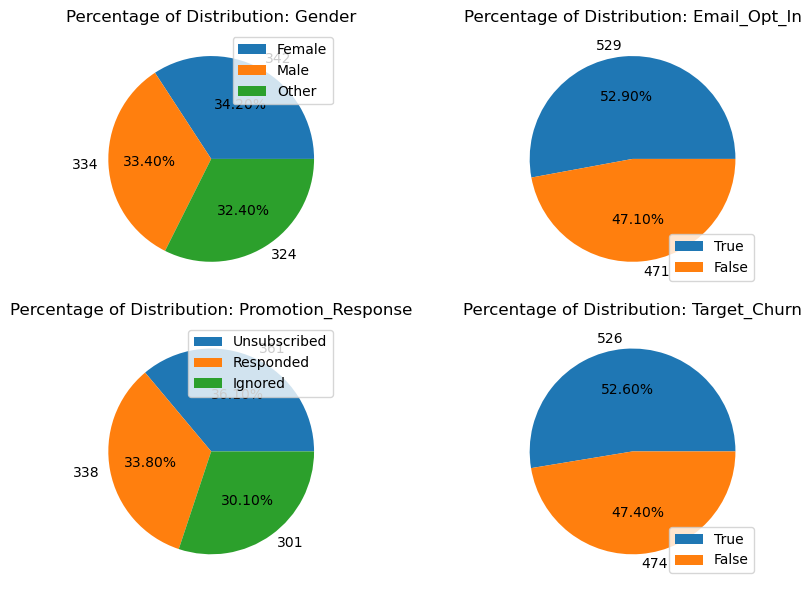

In [284]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(2):
        counts = df[categoricals[index]].value_counts()
        axes[i][j].pie(counts, autopct="%0.2f%%", labels=counts)
        axes[i][j].legend(counts.index)
        axes[i][j].set_title(f'Percentage of Distribution: {df[categoricals[index]].name}')
        index += 1
        
plt.tight_layout()
plt.show()

 Above visual is the exploration of the distribution of categorical data, providing insights into the composition of each category within the dataset.

# Exploratory Analysis

## A. Exploring Churn Rate  
Calculated the churn rate by dividing the number of churners by the total number of customers. 
This will give  an overall understanding of how many customers churn and not churn.

Target_Churn
True     526
False    474
Name: count, dtype: int64
Proportion of churned customers: 52.6


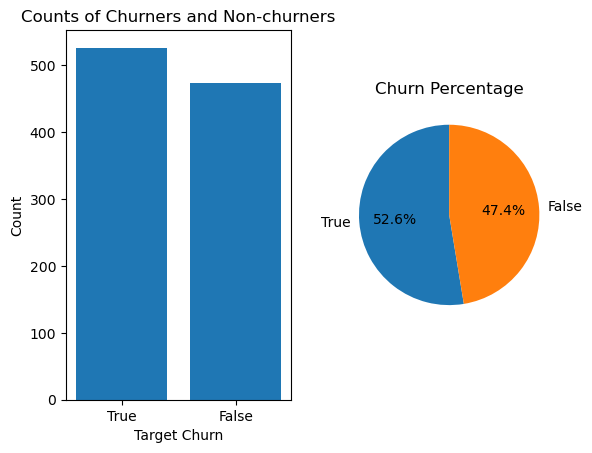

In [198]:
#Explore Churn Rate/count

ChurnCount= df["Target_Churn"].value_counts()
print(ChurnCount)
proportion_churn_true = (churn_true_count / df.shape[0])* 100.0
print("Proportion of churned customers:", proportion_churn_true)

plt.subplot(1,2,1)
plt.bar(ChurnCount.index.astype(str), ChurnCount.values,)
plt.xlabel('Target Churn')
plt.ylabel('Count')
plt.title('Counts of Churners and Non-churners')

plt.subplot(1,2,2)
plt.pie(ChurnCount,labels=ChurnCount.index, autopct='%1.1f%%', startangle=90 )
plt.title('Churn Percentage')
plt.show()

The output shows that there are **526** churners and **474** non-churners in the dataset. The proportion of churned customers is approximately **52.6%**.

## B.Examining Churn Characteristics / Descriptive Statistics

- Comparing  the characteristics of churners and non-churners in dataset. Looked at demographic variables like age and gender, as well as behavioral variables like total spend, average transaction amount, and number of purchases. To find the difference .

### 1. Demographic Variables:

Gender Count for churnner: Gender
Female    179
Other     178
Male      169
Name: count, dtype: int64
Gender Count for non churnner: Gender
Male      165
Female    163
Other     146
Name: count, dtype: int64


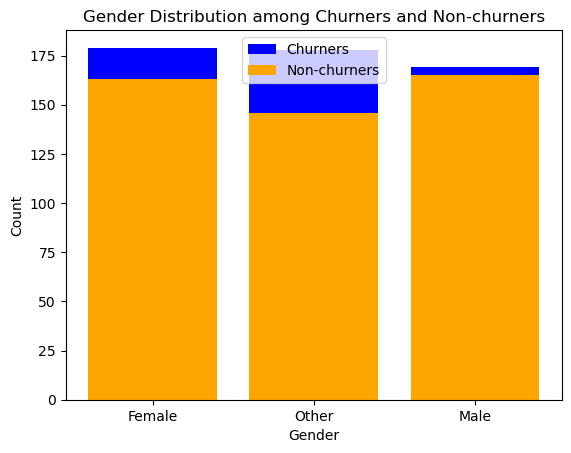

In [292]:
# Gender 
gender_churn_true = df[df["Target_Churn"] == True]["Gender"].value_counts()
gender_churn_false = df[df["Target_Churn"] == False]["Gender"].value_counts()
print("Gender Count for churnner:", gender_churn_true) 
print("Gender Count for non churnner:", gender_churn_false)
plt.bar(gender_churn_true.index, gender_churn_true.values, color='blue', label='Churners')
plt.bar(gender_churn_false.index, gender_churn_false.values, color='orange', label='Non-churners')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution among Churners and Non-churners')
plt.legend()
plt.show()



From the gender distribution among churners and non-churners, a few trends or observations can be noted:  - Gender Distribution:Among both churners and non-churners, there is a relatively balanced distribution of genders.
- *Similar Gender Counts  The counts of each gender category are quite similar between churners and non-churners. For example, the count of females is close for both churners and non-churners, and the same applies to males and individuals in the "Other" gender category.
- Potential Insight:
The similarity in gender distribution between churners and non-churners suggests that gender alone may not be a strong predictor of churn. Other factors may have more influence on customer churn behavior.g predictors of churn.

Email_Opt_In Count for churnner: Email_Opt_In
True     278
False    248
Name: count, dtype: int64
Email_Opt_In Count for non churnner: Email_Opt_In
True     251
False    223
Name: count, dtype: int64


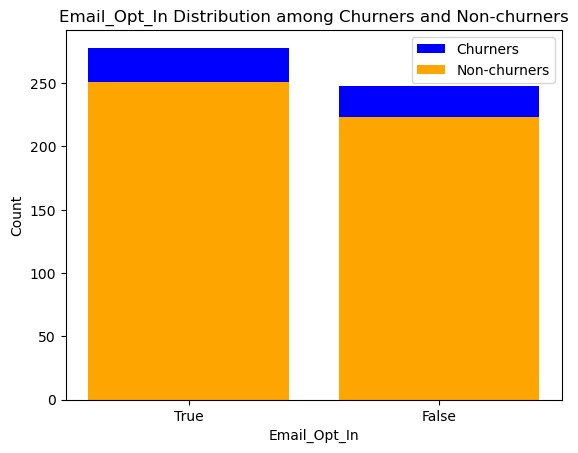

In [293]:
#Email_Opt_In
Email_Opt_In_churn_true = df[df["Target_Churn"] == True]["Email_Opt_In"].value_counts()
Email_Opt_In_churn_false = df[df["Target_Churn"] == False]["Email_Opt_In"].value_counts()
print("Email_Opt_In Count for churnner:", Email_Opt_In_churn_true) 
print("Email_Opt_In Count for non churnner:", Email_Opt_In_churn_false)
plt.bar(Email_Opt_In_churn_true.index.astype(str), Email_Opt_In_churn_true.values, color='blue', label='Churners')
plt.bar(Email_Opt_In_churn_true.index.astype(str), Email_Opt_In_churn_false.values, color='orange', label='Non-churners')
plt.xlabel('Email_Opt_In')
plt.ylabel('Count')
plt.title('Email_Opt_In Distribution among Churners and Non-churners')
plt.legend()
plt.show()


- Email Opt-In Trend: 
Among churners, the count of individuals who opted into receiving emails is higher (278) compared to those who did not (248).
Conversely, among non-churners, the count of individuals who opted into receiving emails (251) is also higher than those who did not (223).

- Potential Insight:
The higher count of individuals opting into receiving emails among both churners and non-churners suggests that there might not be a strong association between email opt-in status and churn.

Promotion_Response Count for churnner: Promotion_Response
Unsubscribed    186
Responded       181
Ignored         159
Name: count, dtype: int64
Promotion_Response Count for non churnner: Promotion_Response
Unsubscribed    175
Responded       157
Ignored         142
Name: count, dtype: int64


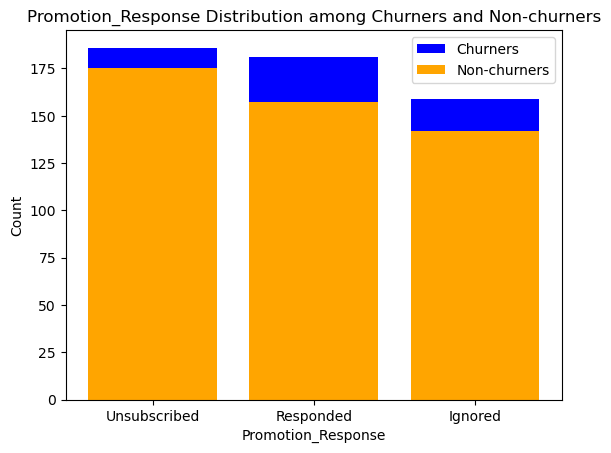

In [294]:
#Promotion_Response
Promotion_Response_churn_true = df[df["Target_Churn"] == True]["Promotion_Response"].value_counts()
Promotion_Response_churn_false = df[df["Target_Churn"] == False]["Promotion_Response"].value_counts()
print("Promotion_Response Count for churnner:", Promotion_Response_churn_true) 
print("Promotion_Response Count for non churnner:", Promotion_Response_churn_false)
plt.bar(Promotion_Response_churn_true.index.astype(str), Promotion_Response_churn_true.values, color='blue', label='Churners')
plt.bar(Promotion_Response_churn_true.index.astype(str), Promotion_Response_churn_false.values, color='orange', label='Non-churners')
plt.xlabel('Promotion_Response')
plt.ylabel('Count')
plt.title('Promotion_Response Distribution among Churners and Non-churners')
plt.legend()
plt.show()

- **Promotion Response Trend:** Among churners, the count of individuals who unsubscribed from promotions is higher (186) compared to those who responded (181) or ignored (159) promotions. Similarly, among non-churners, the count of individuals who unsubscribed from promotions (175) is higher than those who responded (157) or ignored (142) promotions.

- **Potential Insight:** The higher count of individuals unsubscribing from promotions among both churners and non-churners suggests that promotion response alone may not be a strong predictor of churn.
ights.

Average age of churners  43.133079847908746
Average age of non churners  43.41561181434599


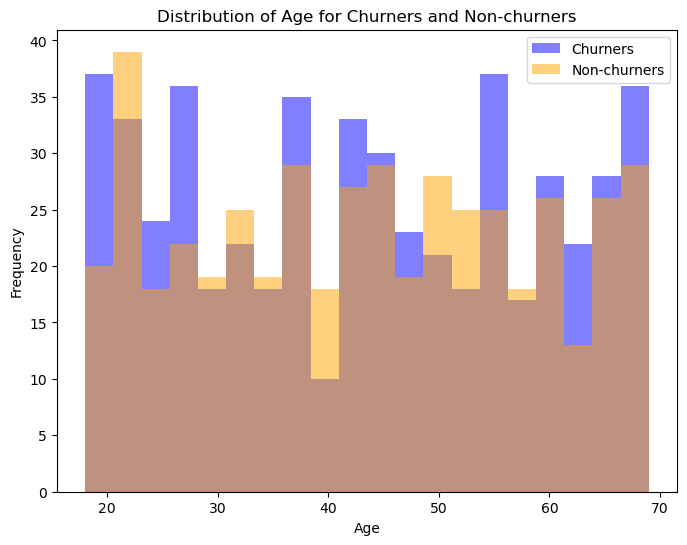

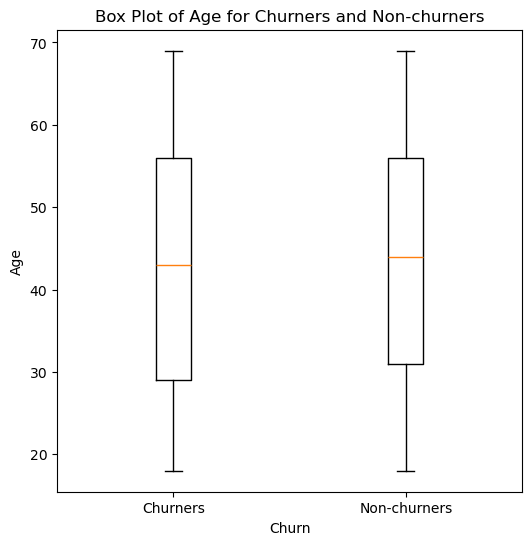

In [6]:
# Average age of churners
age_churn_true = df[df["Target_Churn"] == True]["Age"].mean()
print( "Average age of churners ",age_churn_true)

# Average age of non-churners
age_churn_false = df[df["Target_Churn"] == False]["Age"].mean()
print( "Average age of non churners ",age_churn_false)

# Histograms of age for churners and non-churners
plt.figure(figsize=(8, 6))
plt.hist(df[df["Target_Churn"] == True]["Age"], bins=20, color='blue', alpha=0.5, label='Churners')
plt.hist(df[df["Target_Churn"] == False]["Age"], bins=20, color='orange', alpha=0.5, label='Non-churners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Churners and Non-churners')
plt.legend()
plt.show()


plt.figure(figsize=(6, 6))
# Create box plots for churners and non-churners
plt.boxplot([df[df["Target_Churn"] == True]["Age"], df[df["Target_Churn"] == False]["Age"]],
            labels=['Churners', 'Non-churners'])
# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Box Plot of Age for Churners and Non-churners')
# Show plot
plt.show()


- This visualization allows us to compare the age distributions of churners and non-churners.Helps identify differences in the spread and central tendency of ages between churners and non-churners.Overall, these visualizations and statistics provide insights into how age may relate to customer churn in the dataset.
- The similarity in Age distribution between churners and non-churners suggests that Age  may not be a strong predictor of churn. 

Target_Churn
False    113.983924
True     110.141787
Name: Annual_Income, dtype: float64


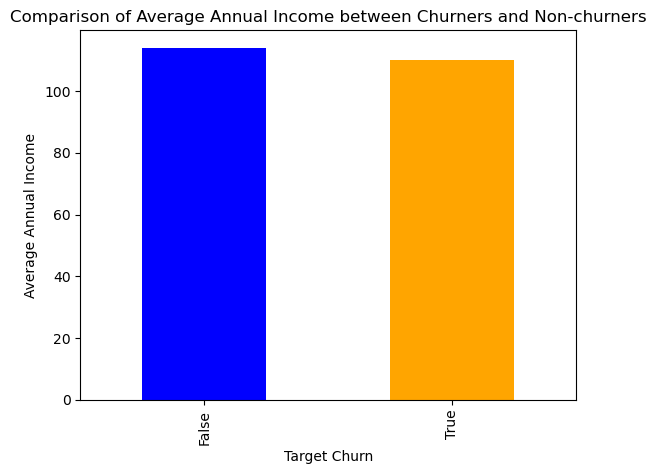

In [220]:
# Compare the average annual income of churners and non-churners.

avg_income=df.groupby("Target_Churn")["Annual_Income"].mean()
print(avg_income)
# Plot bar chart
avg_income.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Annual Income')
plt.title('Comparison of Average Annual Income between Churners and Non-churners')

# Show plot
plt.show()

- We can observe that the average annual income of churners (110.14) is slightly lower than that of non-churners (113.98). This suggests that there might be a slight correlation between lower income and higher churn rates.

### 2. Behavioral Variables:

In [225]:
#Behavioral Variables:
# gender wise spend 
gender_spend_stats=df.groupby("Gender")["Total_Spend"].agg({"sum","median","mean"}) #Gender wise spend
print(gender_spend_stats)


          median         mean         sum
Gender                                   
Female  5124.055  5248.513509  1794991.62
Male    4665.655  4933.998024  1647955.34
Other   5184.340  5055.079290  1637845.69


- Female customers have the highest median and mean spending, followed by Other and Male customers.- 
Despite Female customers having the highest spending on average, the total sum of spending is highest for Female customers as well, indicating a significant contribution to overall sales.

Target_Churn
False    4994.426835
True     5158.620399
Name: Total_Spend, dtype: float64


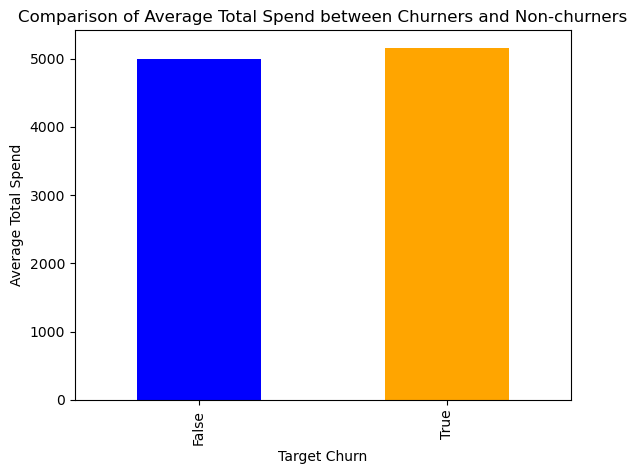

In [9]:
# Average total spend 
abg_total_spend=df.groupby("Target_Churn")["Total_Spend"].mean()
print(abg_total_spend)
# Plot bar chart
abg_total_spend.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Total Spend')
plt.title('Comparison of Average Total Spend between Churners and Non-churners')

# Show plot
plt.show()

- On average, churners tend to spend slightly more than non-churners. This suggests that there might be a correlation between higher spending behavior and churn.

In [227]:
# Average total spned by group
df.groupby(["Target_Churn","Gender"])["Total_Spend"].agg({"sum","median","mean"})


median         mean        sum
Target_Churn Gender                                  
False        Female  4769.470  5060.511963  824863.45
             Male    4631.080  4823.434485  795866.69
             Other   5630.245  5113.891644  746628.18
True         Female  5524.280  5419.710447  970128.17
             Male    4767.650  5041.944675  852088.65
             Other   4957.710  5006.839944  891217.51

- Potential Gender-Related Insights: 
While females generally tend to spend more on average compared to males and individuals of other genders, this spending behavior does not seem to significantly influence churn rate
- No Clear Gender-Based Pattern in Churn: Both churners and non-churners exhibit similar spending behavior across different gender categories.. 

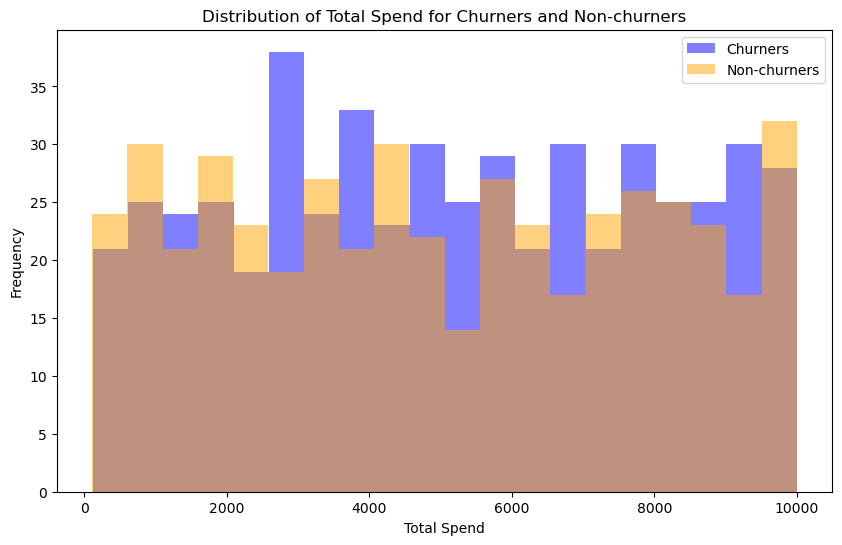

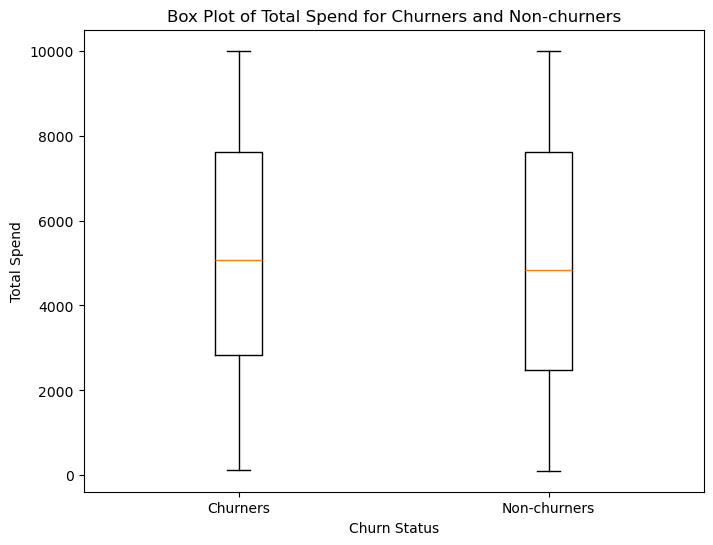

In [96]:
# Prepare data
total_spend_churn_true = df[df["Target_Churn"] == True]["Total_Spend"]
total_spend_churn_false = df[df["Target_Churn"] == False]["Total_Spend"]

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(total_spend_churn_true, bins=20, color='blue', alpha=0.5, label='Churners')
plt.hist(total_spend_churn_false, bins=20, color='orange', alpha=0.5, label='Non-churners')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spend for Churners and Non-churners')
plt.legend()
plt.show()

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot([total_spend_churn_true, total_spend_churn_false], labels=['Churners', 'Non-churners'])
plt.xlabel('Churn Status')
plt.ylabel('Total Spend')
plt.title('Box Plot of Total Spend for Churners and Non-churners')
plt.show()

These visualizations help to gain insights into how total spend varies among churners and non-churners and whether there are any notable differences in their spending behavior.As we can see there is not much difference 

In [ ]:
# Average Transaction Amount: Compare the average transaction amount for churners and non-churners.

Target_Churn
False    270.673776
True     263.454677
Name: Average_Transaction_Amount, dtype: float64


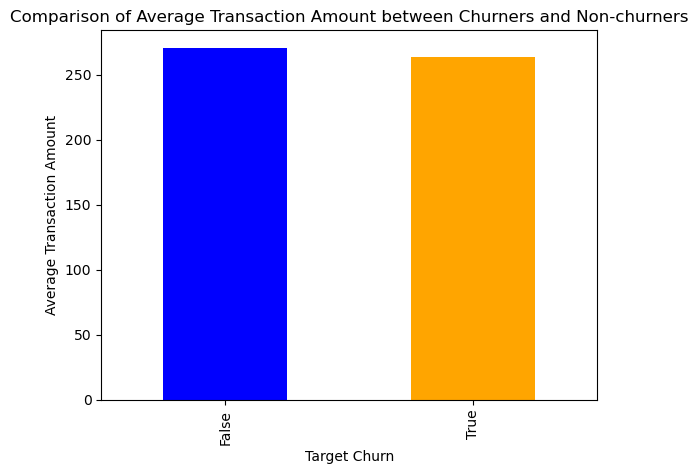

In [229]:
avg_transaction_amount=df.groupby("Target_Churn")["Average_Transaction_Amount"].mean()

print(avg_transaction_amount)
# Plot bar chart
avg_transaction_amount.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Transaction Amount')
plt.title('Comparison of Average Transaction Amount between Churners and Non-churners')

# Show plot
plt.show()

- This suggests that, on average, non-churners tend to have slightly higher transaction amounts compared to churners. However, the difference between the two groups is relatively small.

Target_Churn
False    50.440928
True     48.568441
Name: Num_of_Purchases, dtype: float64


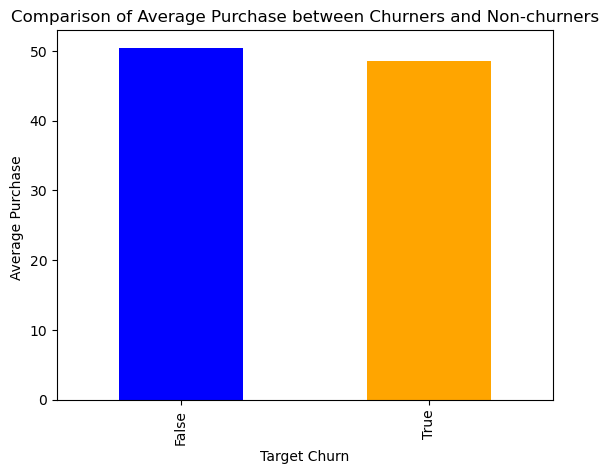

In [234]:
#Number of Purchases: Calculate the average number of purchases for both groups.
num_purchase= df.groupby("Target_Churn")["Num_of_Purchases"].mean()
print(num_purchase)
# Plot bar chart
num_purchase.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Purchase ')
plt.title('Comparison of Average Purchase between Churners and Non-churners')

# Show plot
plt.show()

- This suggests that, on average, non-churners tend to make slightly more purchases compared to churners. However, the difference in the average number of purchases between the two groups is relatively small.

Target_Churn
False    4.611814
True     4.612167
Name: Num_of_Returns, dtype: float64


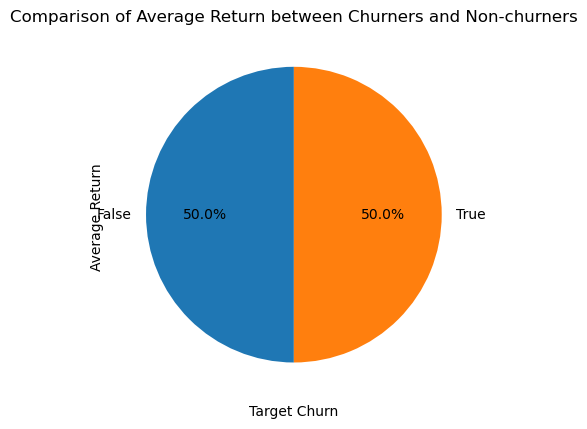

In [237]:
#Number of Returns: Compare the average number of returns for churners and non-churners.
num_return= df.groupby("Target_Churn")["Num_of_Returns"].mean()
print(num_return)
# Plot bar chart
num_return.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Return ')
plt.title('Comparison of Average Return between Churners and Non-churners')

# Show plot
plt.show()

- This suggests that there is not a significant difference in the average number of returns between churners and non-churners.







Target_Churn
False    1.919831
True     1.946768
Name: Num_of_Support_Contacts, dtype: float64


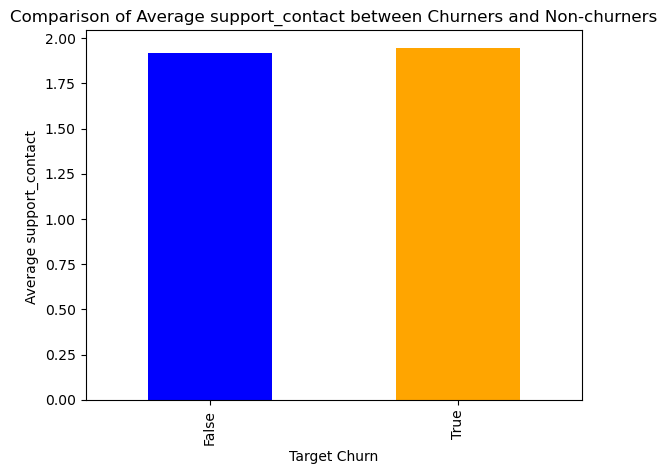

In [238]:
#Number of Support Contacts: Examine whether there's a difference in the average number of support contacts between the two groups.
support_contact= df.groupby("Target_Churn")["Num_of_Support_Contacts"].mean()
print(support_contact)
# Plot bar chart
support_contact.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average support_contact ')
plt.title('Comparison of Average support_contact between Churners and Non-churners')

# Show plot
plt.show()

- This suggests that churners tend to reach out for support slightly more often than non-churners, indicating a potential area where efforts could be focused to improve customer satisfaction and retention.

Target_Churn
False    2.940928
True     3.003802
Name: Satisfaction_Score, dtype: float64


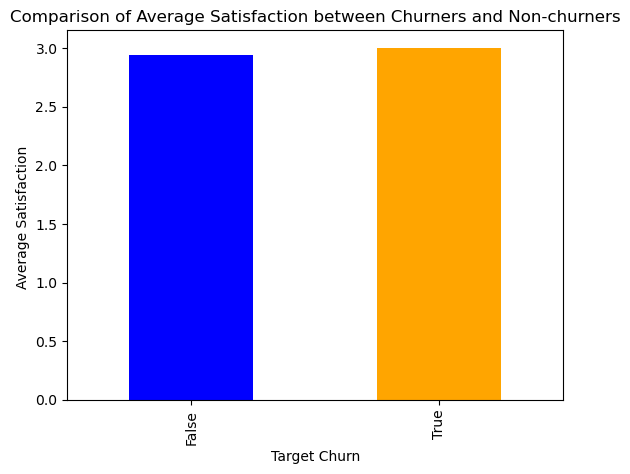

In [239]:
#Satisfaction Score: Compare the average satisfaction score for churners and non-churners.
Satisfaction=df.groupby("Target_Churn")["Satisfaction_Score"].mean()
print(Satisfaction)
# Plot bar chart
Satisfaction.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Target Churn')
plt.ylabel('Average Satisfaction ')
plt.title('Comparison of Average Satisfaction between Churners and Non-churners')

# Show plot
plt.show()

- This implies that churners tend to have a slightly higher level of satisfaction compared to non-churners. However, it's essential to note that this difference is relatively small and may not be significant in isolation. Other factors should be considered when analyzing customer churn.

### 3.Statistical Analysis:
- Perform statistical tests such as t-tests to determine if there are significant differences between churners and non-churners for each variable.

In [142]:
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


### t-test for ["Average_Transaction_Amount"]

In [144]:
# Extract average transaction amount for churners and non-churners
avg_transaction_churn_true = df[df["Target_Churn"] == True]["Average_Transaction_Amount"]
avg_transaction_churn_false = df[df["Target_Churn"] == False]["Average_Transaction_Amount"]
print(avg_transaction_churn_true)
print(avg_transaction_churn_false)

0      453.80
2       50.53
3      411.83
8      173.80
11     212.58
        ...  
992     46.12
994    250.92
996     34.45
998    483.80
999    420.91
Name: Average_Transaction_Amount, Length: 526, dtype: float64
1       22.90
4      101.19
5      417.78
6      316.18
7       63.61
        ...  
989    431.91
991    306.82
993    418.46
995     77.75
997    187.37
Name: Average_Transaction_Amount, Length: 474, dtype: float64


In [145]:
# Calculate sample means and standard deviations
mean_churn_true = np.mean(avg_transaction_churn_true)
mean_churn_false = np.mean(avg_transaction_churn_false)
std_churn_true = np.std(avg_transaction_churn_true, ddof=1)  # Use ddof=1 for sample standard deviation
std_churn_false = np.std(avg_transaction_churn_false, ddof=1)

print(mean_churn_true)
print(mean_churn_false)
print(std_churn_true)
print(std_churn_false)

263.4546768060837
270.67377637130807
142.81660348916392
149.25171787793383


In [147]:
# Calculate t-statistic
n1 = len(avg_transaction_churn_true)
n2 = len(avg_transaction_churn_false)
t_statistic = (mean_churn_true - mean_churn_false) / np.sqrt((std_churn_true**2 / n1) + (std_churn_false**2 / n2))

print(n1)
print(n2)
print(t_statistic)

526
474
-0.7794862545976035


In [148]:
# Calculate degrees of freedom
df = n1 + n2 - 2
print(df)

998


In [149]:
# Calculate p-value using t-distribution
from scipy import stats

p_value = (1 - stats.t.cdf(abs(t_statistic), df)) * 2  # Multiply by 2 for two-tailed test
print(p_value)

0.43587813384509877


In [150]:
# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.7794862545976035
P-value: 0.43587813384509877


- T-statistic: The calculated t-statistic value of approximately -0.779 suggests that the difference in the mean average transaction amount between churners and non-churners is negative. This means that, on average, churners tend to have a slightly lower average transaction amount compared to non-churners.
- 
P-value: The p-value associated with the t-test is approximately 0.436. This p-value is greater than the typical significance level of 0.05, indicating that the observed difference in the mean average transaction amount between churners and non-churners is not statistically significan
- there appears to be a slight difference in the mean average transaction amount between churners and non-churners, this difference is not statistically significant at the conventional significance level of 0.05.
- we do not have enough evidence to conclude that there is a significant difference in the average transaction amount between churners and non-churners.
- the analysis suggests that the average transaction amount may not be a strong predictor of churn on its own. However, it's essential to consider other factors and conduct further analysis to identify predictors of churn effectively.t.

### t-test for ["Total_Spend"]

In [13]:
from scipy import stats
total_spend_churn_true = df[df["Target_Churn"] == True]["Total_Spend"]
total_spend_churn_false = df[df["Target_Churn"] == False]["Total_Spend"]

# Calculate sample means and standard deviations
mean2_churn_true = np.mean(total_spend_churn_true)
mean2_churn_false = np.mean(total_spend_churn_false)
std2_churn_true = np.std(total_spend_churn_true, ddof=1)  # Use ddof=1 for sample standard deviation
std2_churn_false = np.std(total_spend_churn_false, ddof=1)

# Calculate t-statistic
no1 = len(total_spend_churn_true)
no2 = len(total_spend_churn_false)
t2_statistic = (mean2_churn_true - mean2_churn_false) / np.sqrt((std2_churn_true**2 / no1) + (std2_churn_false**2 / no2))

# Calculate degrees of freedom
df3 = no1 + no2 - 2

# Calculate p-value using t-distribution
p2_value = (1 - stats.t.cdf(abs(t2_statistic), df3)) * 2  # Multiply by 2 for two-tailed test

# Print results
print("T-statistic:", t2_statistic)
print("P-value:", p2_value)



T-statistic: 0.9042045680182655
P-value: 0.3661051478952433


- T-statistic: The calculated t-statistic value of approximately 0.904 suggests that the difference in the mean total spend between churners and non-churners is positive. This implies that, on average, churners tend to have a slightly higher total spend compared to non-churners.
- 
P-value: The p-value associated with the t-test is approximately 0.366. This p-value is greater than the typical significance level of 0.05, indicating that the observed difference in the mean total spend between churners and non-churners is not statistically significan
- While there appears to be a slight difference in the mean total spend between churners and non-churners, this difference is not statistically significant at the conventional significance level of 0.05.- 
Therefore, we do not have enough evidence to conclude that there is a significant difference in the mean total spend between churners and non-churner
- the analysis suggests that the total spend alone may not be a strong predictor of churn. Further investigation and consideration of additional factors are needed to effectively identify predictors of churn.


s.t.

In [156]:
# Calculate Cohen's d
mean_difference = mean_churn_true - mean_churn_false
pooled_std = np.sqrt(((n1 - 1) * std_churn_true**2 + (n2 - 1) * std_churn_false**2) / (n1 + n2 - 2))
cohen_d = mean_difference / pooled_std

print("Cohen's d:", cohen_d)


Cohen's d: -0.04947913382239789


- the negative value implies that churners tend to have slightly lower values (on average) compared to non-churners. However, the effect size is relatively small, indicating a limited practical significance of the difference between the two groups.

In [15]:
# Calculate Cohen's d
mean_difference = mean2_churn_true - mean2_churn_false
pooled_std = np.sqrt(((no1 - 1) * std2_churn_true**2 + (no2 - 1) * std2_churn_false**2) / (no1 + no2 - 2))
cohen_d = mean_difference / pooled_std

print("Cohen's d:", cohen_d) 

Cohen's d: 0.05736258822275277


- Cohen's d measures the effect size, which indicates the standardized difference between two means. A Cohen's d of 0.057 suggests a small effect size. This means that the difference between the means of the two groups (churners and non-churners) is relatively small when compared to the variability within each group.

In [172]:
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


### C.Correlation Analysis:
- Used correlation analysis to identify variables that are strongly correlated with churn. 

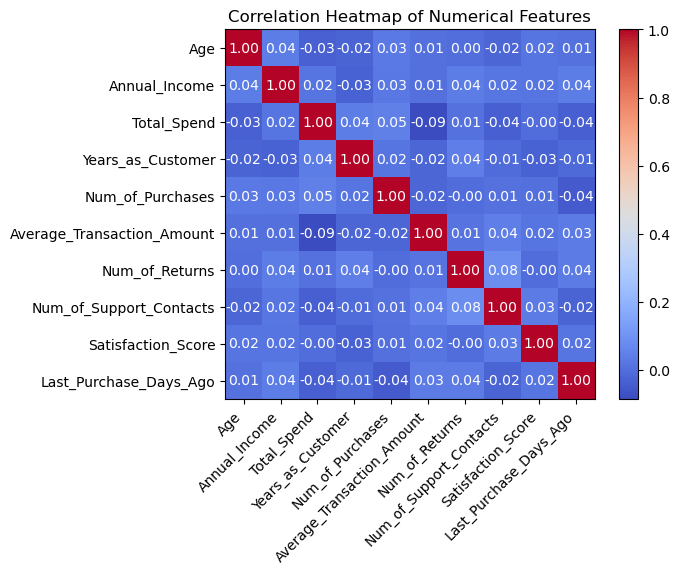

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example correlation matrix (replace with your own data)
num_features = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases',
                'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
                'Last_Purchase_Days_Ago']
corr_matrix = df[num_features].corr().values
# Create heatmap
plt.imshow(corr_matrix, cmap='coolwarm')

# Add text annotations directly on heatmap
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Add color bar
plt.colorbar()
# Add feature names to the side
plt.xticks(np.arange(len(num_features)), num_features, rotation=45, ha='right')
plt.yticks(np.arange(len(num_features)), num_features)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


###  chi-squared test

              Feature   P-value
0              Gender  0.533569
1        Email_Opt_In  0.974291
2  Promotion_Response  0.862321


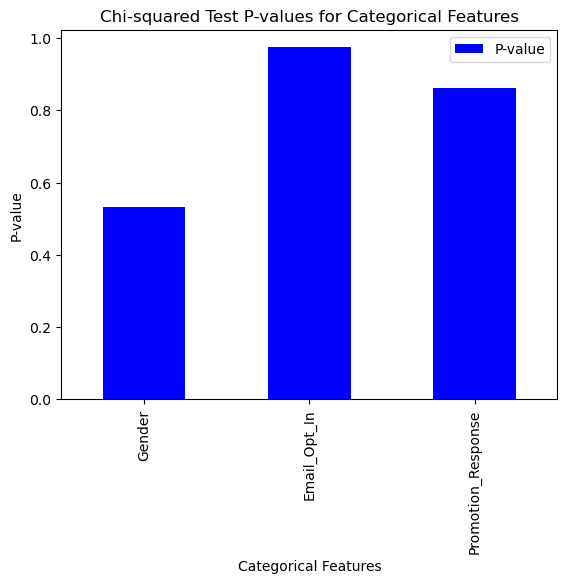

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define categorical features
cat_features = ['Gender', 'Email_Opt_In', 'Promotion_Response']
p_values = []

# Perform chi-squared tests and store p-values
for feature in cat_features:
    # Create contingency table
    contingency_table = pd.crosstab(index=df[feature], columns=df['Target_Churn'])
    
    # Calculate expected frequencies under independence assumption
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    expected = np.outer(row_totals, col_totals) / df.shape[0]
    
    # Calculate chi-squared statistic
    chi2 = np.sum((contingency_table.values - expected)**2 / expected)
    
    # Calculate degrees of freedom
    degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    
    # Calculate p-value
    p_value = 1 - stats.chi2.cdf(chi2, degrees_of_freedom)
    
    # Store p-value
    p_values.append(p_value)

# Create DataFrame with p-values
p_values_df = pd.DataFrame({'Feature': cat_features, 'P-value': p_values})
print(p_values_df)
# Plot bar chart
p_values_df.plot(kind='bar', x='Feature', y='P-value', color='blue')

# Add labels and title
plt.xlabel('Categorical Features')
plt.ylabel('P-value')
plt.title('Chi-squared Test P-values for Categorical Features')

# Show plot
plt.show()


- The chi-squared test p-values indicate whether there is a statistically significant association between each categorical feature (Gender, Email_Opt_In, Promotion_Response) and the target variable (Target_Churn).  
- 
Gender: The p-value (0.534) suggests that there is no statistically significant association between gender and churn statu  s- .
Email_Opt_In: With a p-value of 0.974, there is no statistically significant association between email opt-in status and churn stat  u- s.
Promotion_Response: Similarly, the p-value (0.862) indicates no statistically significant association between promotion response and churn sta  
  t- us.
In summary, based on these p-values, there is no strong evidence to suggest that these categorical features have a significant influence on churn status.

# Conclusion:


Based on the analyses conducted
- **Demographic Factors:**

Gender alone does not seem to be a strong predictor of churn.
There is a relatively balanced distribution of genders among churners and non-churne

- **Behavioral Variables:**

Total spend, average transaction amount, number of purchases, number of returns, and satisfaction score do not show significant differences between churners and non-churners.
There is a slight difference in the average number of support contacts between churners and non-churners, but it may not be substantial.
Chi-squared tests on categorical features (gender, email opt-in, promotion response) do not show significant associations with ch

- **Effect Sizes:**

Cohen's d values for various metrics are close to zero, indicating small effect sizes and suggesting that the differences between churners and non-churners are not substantia

- **Statitical Test:**
 
Based on the data and the chosen significance level, there is no strong evidence to support the hypothesis that churners have significantly different total spend or average transaction amount compared to non-churners.

- **Visualization:**

Visualizations such as histograms and box plots provide additional insights into the distribution of numerical features among churners and non-churner

- while there are some differences in certain metrics between churners and non-churners, these differences are relatively small and may not be practically significant. **l.urn.rs.:

# Recommendation:

- Project focuses on understanding and reducing customer churn, which is when customers stop using services. By analyzing customer data, we've identified key factors influencing churn, such as satisfaction levels, spending behavior, and response to promotions.
- In order to gain deeper insights into customer churn and further refine our strategies, it's crucial to gather additional data. This may include more granular information on customer interactions, feedback channels, and external factors influencing churn. By expanding our dataset and conducting thorough analysis, we can better understand the complexities of customer behavior and tailor our retention efforts more effectively.

# Thank You!